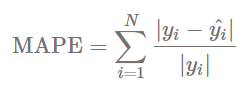

## 0. Lib, dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
% matplotlib inline
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix

In [2]:
data_train = pd.read_csv('/content/drive/MyDrive/python/Rolling in the deep/energy/data/train.csv', encoding='cp949')
data_test = pd.read_csv('/content/drive/MyDrive/python/Rolling in the deep/energy/data/test.csv', encoding='cp949')

In [3]:
df = data_train.copy()

In [4]:
df.shape

(122400, 10)

In [5]:
df.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [6]:
df.describe()

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
count,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000
mean,30.500000,2324.830866,24.251713,2.151641,80.169848,0.514989,0.213533,0.683333,0.483333
std,17.318173,2058.999326,3.407902,1.514475,15.525862,2.624505,0.370517,0.465178,0.499724
min,1.000000,0.000000,11.100000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,15.750000,1055.268000,21.800000,1.100000,70.000000,0.000000,0.000000,0.000000,0.000000
50%,30.500000,1700.352000,24.200000,1.900000,84.000000,0.000000,0.000000,1.000000,0.000000
75%,45.250000,2780.487000,26.500000,2.900000,93.000000,0.000000,0.300000,1.000000,1.000000
max,60.000000,17739.225000,36.300000,20.100000,100.000000,81.500000,1.000000,1.000000,1.000000


In [7]:
df.rename(columns={'전력사용량(kWh)' : 'Power Usage (kWh)',
                   '기온(°C)': 'Temperature (Cel)',
                   '풍속(m/s)' : 'Wind Speed (m/s)',
                   '습도(%)' : 'Humidity',
                   '강수량(mm)' : 'Precipitation (mm)',
                   '일조(hr)' : 'Sunlight (hr)', 
                   '비전기냉방설비운영' : 'non-electric cooling fac',
                   '태양광보유' : 'Photovoltaic'}, inplace=True)

## 1. EDA

### 1.0 Null Values

In [8]:
for i in df.columns:
  print(df[i].isnull().sum())

0
0
0
0
0
0
0
0
0
0


### 1.1 num
 - 건물번호
 - 건물당 2040개 데이터 (85일간 총 2040시간의 전력 사용량 데이터)

In [9]:
df['num'].value_counts()

60    2040
59    2040
28    2040
27    2040
26    2040
25    2040
24    2040
23    2040
22    2040
21    2040
20    2040
19    2040
18    2040
17    2040
16    2040
15    2040
14    2040
13    2040
12    2040
11    2040
10    2040
9     2040
8     2040
7     2040
6     2040
5     2040
4     2040
3     2040
2     2040
29    2040
30    2040
31    2040
46    2040
58    2040
57    2040
56    2040
55    2040
54    2040
53    2040
52    2040
51    2040
50    2040
49    2040
48    2040
47    2040
45    2040
32    2040
44    2040
43    2040
42    2040
41    2040
40    2040
39    2040
38    2040
37    2040
36    2040
35    2040
34    2040
33    2040
1     2040
Name: num, dtype: int64

In [10]:
# data 수 / 건물 수
df.shape[0] / len(df['num'].unique())

2040.0

In [11]:
# (data 수 / 건물 수) / 24시간
df.shape[0] / len(df['num'].unique()) / 24

85.0

### 1.2. Date_time
 - 날짜 & 시간

In [12]:
df['date_time'].value_counts()

2020-06-25 07    60
2020-06-03 05    60
2020-07-22 12    60
2020-07-15 01    60
2020-07-03 09    60
                 ..
2020-07-14 14    60
2020-08-11 05    60
2020-07-16 12    60
2020-06-20 03    60
2020-06-10 04    60
Name: date_time, Length: 2040, dtype: int64

### 1.3. Power Usage (kWh)
 - 전력사용량
  - Target

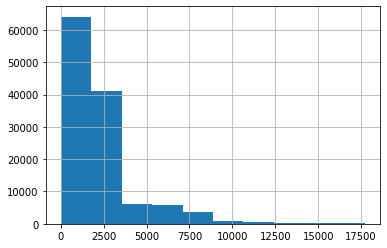

In [13]:
df['Power Usage (kWh)'].hist()

In [14]:
df['Power Usage (kWh)'].max()

17739.225

### 1.4. Temperature (Cel)
 - 기온

In [15]:
df['Temperature (Cel)'].describe()

count    122400.000000
mean         24.251713
std           3.407902
min          11.100000
25%          21.800000
50%          24.200000
75%          26.500000
max          36.300000
Name: Temperature (Cel), dtype: float64

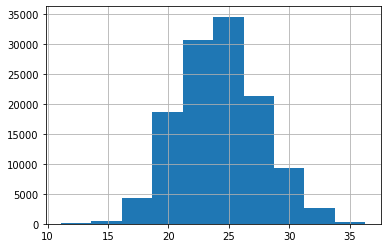

In [16]:
df['Temperature (Cel)'].hist()

### 1.5. Wind Speed (m/s)	
 - 풍속
  - 풍력발전기?

In [17]:
df['Wind Speed (m/s)'].describe()

count    122400.000000
mean          2.151641
std           1.514475
min           0.000000
25%           1.100000
50%           1.900000
75%           2.900000
max          20.100000
Name: Wind Speed (m/s), dtype: float64

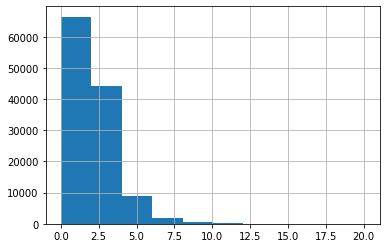

In [18]:
df['Wind Speed (m/s)'].hist()

### 1.6. Humidity
 - 습도

In [19]:
df['Humidity'].describe()

count    122400.000000
mean         80.169848
std          15.525862
min          19.000000
25%          70.000000
50%          84.000000
75%          93.000000
max         100.000000
Name: Humidity, dtype: float64

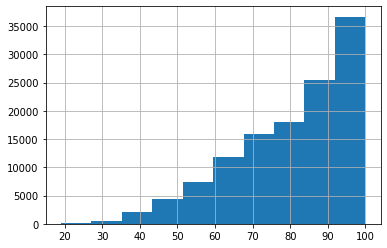

In [20]:
df['Humidity'].hist()

### 1.7. Precipitation (mm)	

In [21]:
df['Precipitation (mm)'].describe()

count    122400.000000
mean          0.514989
std           2.624505
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          81.500000
Name: Precipitation (mm), dtype: float64

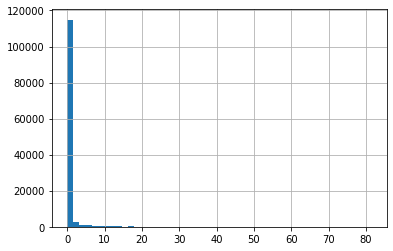

In [22]:
df['Precipitation (mm)'].hist(bins = 50)

### 1.8. Sunlight (hr)	

In [23]:
df['Sunlight (hr)'].describe()

count    122400.000000
mean          0.213533
std           0.370517
min           0.000000
25%           0.000000
50%           0.000000
75%           0.300000
max           1.000000
Name: Sunlight (hr), dtype: float64

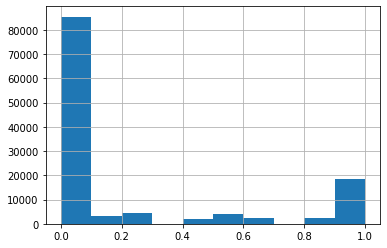

In [24]:
df['Sunlight (hr)'].hist()

### 1.9. non-electric cooling fac	
 - 비전기냉방시설 운영 여부
  - 가령, 지역냉방, 가스냉방 등
    - 지역냉방: 집단에너지시설에서 공급하는 열매체(온수)를 흡수식냉동기 등을 이용해 냉방을 하는 전기대체 냉방방식

In [25]:
df['non-electric cooling fac'].value_counts()

1.0    83640
0.0    38760
Name: non-electric cooling fac, dtype: int64

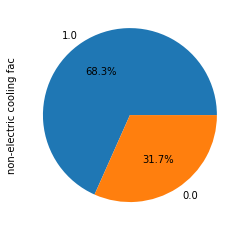

In [26]:
df['non-electric cooling fac'].value_counts().plot(kind='pie', autopct = '%1.1f%%')

### 1.10. Photovoltaic
 - 태양광(발전시설?) 보유 여부

In [27]:
df['Photovoltaic'].value_counts()

0.0    63240
1.0    59160
Name: Photovoltaic, dtype: int64

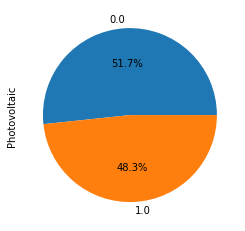

In [28]:
df['Photovoltaic'].value_counts().plot(kind='pie', autopct = '%1.1f%%')

### 1.11. Correlation
 - 일조량과 습도, 기온 간 다소 높은 상관관계

In [29]:
df_corr = df.corr()

In [30]:
df_corr.style.background_gradient(cmap='coolwarm')

,num,Power Usage (kWh),Temperature (Cel),Wind Speed (m/s),Humidity,Precipitation (mm),Sunlight (hr),non-electric cooling fac,Photovoltaic
num,1.000000,-0.063193,0.000363,-0.052184,0.005379,-0.004673,-0.013685,0.061031,0.099181
Power Usage (kWh),-0.063193,1.000000,0.158361,0.109965,-0.077199,-0.006028,0.112131,0.150799,0.116344
Temperature (Cel),0.000363,0.158361,1.000000,0.167455,-0.509105,-0.093788,0.515657,0.019067,0.025865
Wind Speed (m/s),-0.052184,0.109965,0.167455,1.000000,-0.110439,0.083433,0.156381,0.006275,-0.076560
Humidity,0.005379,-0.077199,-0.509105,-0.110439,1.000000,0.208862,-0.627597,-0.031405,-0.020657
Precipitation (mm),-0.004673,-0.006028,-0.093788,0.083433,0.208862,1.000000,-0.112646,-0.003560,-0.016685
Sunlight (hr),-0.013685,0.112131,0.515657,0.156381,-0.627597,-0.112646,1.000000,-0.005695,-0.008412
non-electric cooling fac,0.061031,0.150799,0.019067,0.006275,-0.031405,-0.003560,-0.005695,1.000000,0.084842
Photovoltaic,0.099181,0.116344,0.025865,-0.076560,-0.020657,-0.016685,-0.008412,0.084842,1.000000
